In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
dataset = pd.read_csv(r"C:\Users\gunjan kumar\OneDrive\Documents\Dataset .csv")
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [46]:
# Convert categorical variables to numerical (Yes -> 1, No -> 0)

dataset["Has Table booking"] = dataset["Has Table booking"].map({"Yes": 1, "No": 0})
dataset["Has Online delivery"] = dataset["Has Online delivery"].map({"Yes": 1, "No": 0})

In [47]:
# Group by price range and calculate the mean availability of services

price_range_analysis = dataset.groupby("Price range")[["Has Table booking", "Has Online delivery"]].mean()

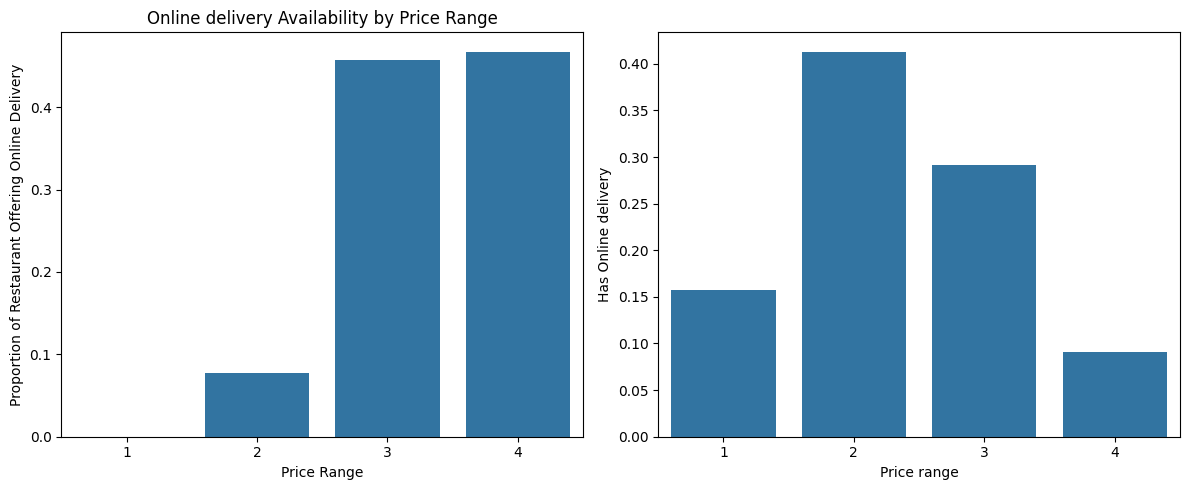

In [48]:
# plot the relationship

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=price_range_analysis.index, y=price_range_analysis["Has Table booking"], ax=ax[0])
ax[0].set_title("Table Booking Availability by Price Range")
ax[0].set_xlabel("Price Range")
ax[0].set_ylabel("Proportion of Restaurant Offering Table Booking")

sns.barplot(x=price_range_analysis.index, y=price_range_analysis["Has Online delivery"], ax=ax[1])
ax[0].set_title("Online delivery Availability by Price Range")
ax[0].set_xlabel("Price Range")
ax[0].set_ylabel("Proportion of Restaurant Offering Online Delivery")

plt.tight_layout()
plt.show()

In [49]:
# Display the calculated proportions

print(price_range_analysis)

             Has Table booking  Has Online delivery
Price range                                        
1                     0.000225             0.157741
2                     0.076775             0.413106
3                     0.457386             0.291903
4                     0.467577             0.090444


In [50]:
# Correlation analysis to check the strength of the relationship

correlation = dataset[["Price range", "Has Table booking", "Has Online delivery"]].corr()
print(correlation)

                     Price range  Has Table booking  Has Online delivery
Price range             1.000000           0.501925             0.077918
Has Table booking       0.501925           1.000000             0.101224
Has Online delivery     0.077918           0.101224             1.000000


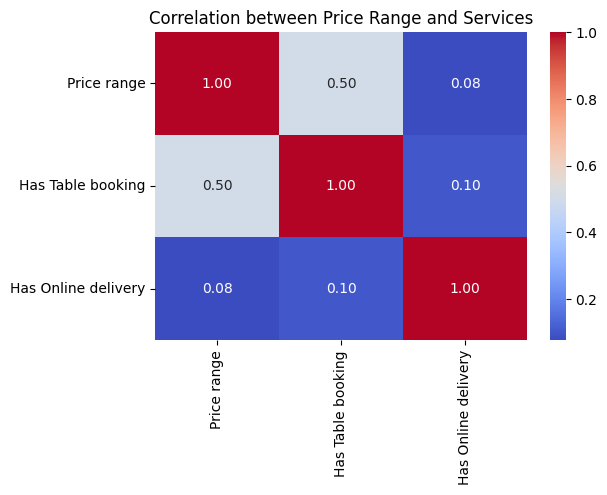

In [51]:
# Visualizing correlation using a heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Price Range and Services")
plt.show()